In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
from datetime import datetime
import seaborn as sns


In [5]:
import os

print(os.listdir("../Anomaly Detection/"))

['.ipynb_checkpoints', 'Module 1 - EDA for Stock Market Data_Twilio.ipynb', 'S&P Benchmark.zip', 'Twillio_data.zip', 'Twillo.ipynb', 'untitled.md']


In [160]:
dat = pd.read_csv("Twillio_data.zip")
dat.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,9/1/2017,29.350000,29.695000,28.799999,28.959999,28.959999,1225700
1,9/5/2017,28.780001,29.430000,28.430000,29.350000,29.350000,1455000
2,9/6/2017,29.260000,30.194000,29.170000,29.879999,29.879999,1696200
3,9/7/2017,29.910000,30.280001,29.500000,29.730000,29.730000,1175300
4,9/8/2017,29.639999,30.280001,29.523001,29.770000,29.770000,994500


In [161]:
dat.info() # convert date -> date!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 7 columns):
Date         510 non-null object
Open         510 non-null float64
High         510 non-null float64
Low          510 non-null float64
Close        510 non-null float64
Adj Close    510 non-null float64
Volume       510 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 28.0+ KB


In [43]:
sp_dat = pd.read_csv("S&P Benchmark.zip")
sp_dat.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,9/1/2017,2474.419922,2480.379883,2473.850098,2476.550049,2476.550049,2710730000
1,9/5/2017,2470.350098,2471.969971,2446.550049,2457.850098,2457.850098,3490260000
2,9/6/2017,2463.830078,2469.639893,2459.199951,2465.540039,2465.540039,3374410000
3,9/7/2017,2468.060059,2468.620117,2460.290039,2465.100098,2465.100098,3353930000
4,9/8/2017,2462.250000,2467.110107,2459.399902,2461.429932,2461.429932,3302490000


In [44]:
sp_dat.info() # same need to convert the date ! 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 7 columns):
Date         510 non-null object
Open         510 non-null float64
High         510 non-null float64
Low          510 non-null float64
Close        510 non-null float64
Adj Close    510 non-null float64
Volume       510 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 28.0+ KB


### Feature Engineering

In [162]:
def convt_date(data): 
    data['Date'] = pd.to_datetime(data['Date'])
    data['year'] = data['Date'].apply(lambda x:x.year)
    data['month'] = data['Date'].apply(lambda x:x.month)
    data['day'] = data['Date'].apply(lambda x:x.day)
    data['weekday'] = data['Date'].apply(lambda x:x.weekday())
    
    data['weekday'] = data['weekday'].astype('category')
    
    return data

In [163]:
convt_date(data=sp_dat)
sp_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 13 columns):
Date           510 non-null datetime64[ns]
Open           510 non-null float64
High           510 non-null float64
Low            510 non-null float64
Close          510 non-null float64
Adj Close      510 non-null float64
Volume         510 non-null int64
perc_change    510 non-null float64
year           510 non-null int64
month          510 non-null int64
day            510 non-null int64
weekday        510 non-null category
range          510 non-null float64
dtypes: category(1), datetime64[ns](1), float64(7), int64(4)
memory usage: 48.6 KB


In [164]:
convt_date(data = dat)
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 11 columns):
Date         510 non-null datetime64[ns]
Open         510 non-null float64
High         510 non-null float64
Low          510 non-null float64
Close        510 non-null float64
Adj Close    510 non-null float64
Volume       510 non-null int64
year         510 non-null int64
month        510 non-null int64
day          510 non-null int64
weekday      510 non-null category
dtypes: category(1), datetime64[ns](1), float64(5), int64(4)
memory usage: 40.6 KB


#### Adding new columns like perc (daily % change), normalized Vol, range of a day, and cov btw the markets

In [274]:
def perc_change_perday(beg, end, digits = 3):
    perc = round((end - beg) / beg, digits)
    return perc *100

In [275]:
dat['perc_change'] = perc_change_perday(beg= dat['Open'], end= dat['Close'], digits = 2)
sp_dat['perc_change'] = perc_change_perday(sp_dat['Open'], sp_dat['Close'], 2)

In [276]:
print("Twillo mean of perc change: ", dat['perc_change'].mean())
print("S&P mean of perc change: ", sp_dat['perc_change'].mean())


Twillo mean of perc change:  0.11372549019607843
S&P mean of perc change:  -0.00980392156862745


In [171]:
'''
basic info for open and close: 

Before taking the cov btw the two markets, i want to take a look at the difference btw the two first! 
''' 
dat_sm = pd.DataFrame({'twillo_open' : dat['Open'].agg(['min','max','median','mean'])})
dat_sm2 = pd.DataFrame({'twillo_close' : dat['Close'].agg(['min','max','median','mean'])})
sp_dat_sm = pd.DataFrame({'sp_open' : sp_dat['Open'].agg(['min','max','median','mean'])})
sp_dat_sm2 = pd.DataFrame({'sp_close' : sp_dat['Close'].agg(['min','max','median','mean'])})
                               
comb_sm = pd.concat([dat_sm, sp_dat_sm, dat_sm2, sp_dat_sm2], axis=1)     

del dat_sm, dat_sm2, sp_dat_sm, sp_dat_sm2


In [172]:
comb_sm

,twillo_open,sp_open,twillo_close,sp_close
min,23.719999,2363.120117,23.600000,2351.100098
max,150.000000,3024.469971,149.949997,3025.860107
median,74.720001,2754.025024,75.159999,2752.035034
mean,77.245363,2753.194531,77.289588,2753.247961


In [173]:
comb_sm.assign(open_diff = lambda x: comb_sm['twillo_open'] / comb_sm['sp_open'] *100,
               clse_diff = lambda x: comb_sm['twillo_close'] / comb_sm['sp_close'] * 100)

,twillo_open,sp_open,twillo_close,sp_close,open_diff,clse_diff
min,23.719999,2363.120117,23.600000,2351.100098,1.003758,1.003785
max,150.000000,3024.469971,149.949997,3025.860107,4.959547,4.955616
median,74.720001,2754.025024,75.159999,2752.035034,2.713120,2.731070
mean,77.245363,2753.194531,77.289588,2753.247961,2.805663,2.807215


The marketsize of twillio is relatively smaller than S&P. But it is worth to take a look at the min, max, median, and mean of each market and see how small the market is. 

According to the above chart, Twillio has similar trend as S&P. 

Now, lets take a look at the Volume:

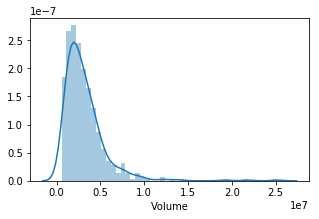

In [174]:
fig = plt.figure(figsize=[5,3])
fig = sns.distplot(dat['Volume'])

It seems that the volume is quite skewed to left. Let's see if 'Normalization' could remedy the issue:

In [175]:
def z_normalize(vol):
    mean = vol.mean()
    std = vol.std()
    z = (vol - mean) / std
    return z

In [176]:
dat['normalized vol'] = z_normalize(dat['Volume'])

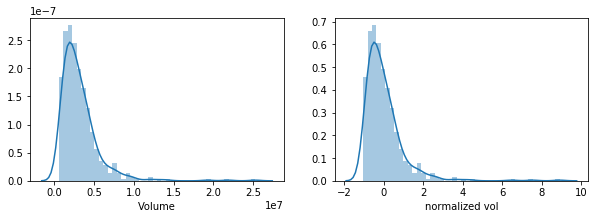

In [177]:
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(10,3)

sns.distplot(dat['Volume'],ax=ax1)
sns.distplot(dat['normalized vol'],ax=ax2)

It seems standard normalization does not do much of good job! How about taking log!

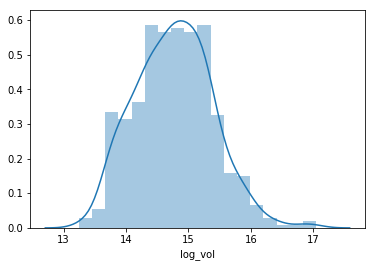

In [178]:
dat['log_vol'] = np.log1p(dat['Volume'])
sns.distplot(dat['log_vol'])

Skewness :3.662
Kurt : 22.765


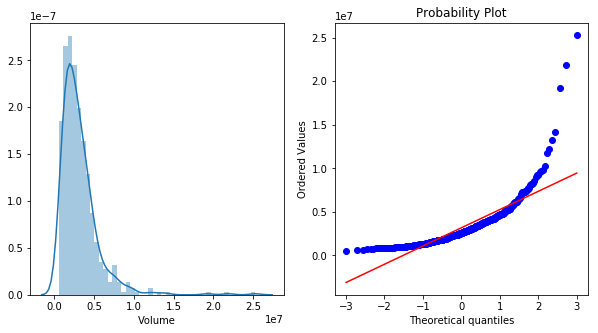

In [185]:
from scipy import stats 
fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.distplot(dat["Volume"], ax = ax[0])  
stats.probplot(dat["Volume"], dist="norm",fit=True, plot = ax[1])

print('Skewness :{:.3f}'.format(dat['Volume'].skew()))
print('Kurt : {:.3f}'.format(dat['Volume'].kurt()))

Skewness :0.259
Kurt : 0.095


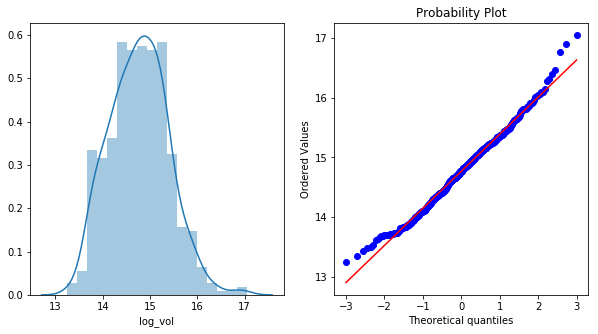

In [186]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.distplot(dat["log_vol"], ax = ax[0])  
stats.probplot(dat["log_vol"], dist="norm",fit=True, plot = ax[1])

print('Skewness :{:.3f}'.format(dat['log_vol'].skew()))
print('Kurt : {:.3f}'.format(dat['log_vol'].kurt())) # looks good ! 

Rage of a day:

In [271]:
# range of a day: 
def cal_range(data, high, low): 
    data['range'] = high - low 
    

In [272]:
cal_range(dat, dat['High'], dat['Low'])
cal_range(sp_dat,sp_dat['High'], sp_dat['Low'])

In [273]:
dat.range.describe()

count    510.000000
mean       3.461323
std        2.583578
min        0.389999
25%        1.321500
50%        3.115000
75%        4.785252
max       16.270004
Name: range, dtype: float64

Before taking the cov btw the two markets, lets take a look how many days were better than the previous days. 

In [244]:
def count_better_than_previous(data, var): 
    count = 0 
    arr = data[var]
    n = len(arr)
    for i in range(1, n - 1, 1): 
        if (arr[i] > arr[i - 1]): 
                count+= 1
    return count


In [245]:
print("From Twillio %d of days were better than previous day for %s:" %(count_better_than_previous(dat, 'Close'), 'Close'))
print("From S&P %d of days were better than previous day for %s:" %(count_better_than_previous(sp_dat, 'Close'), 'Close'))


From Twillio 280 of days were better than previous day for Close:
From S&P 285 of days were better than previous day for Close:


Again, one can find similar trend as S&P on closing days

In [197]:
count = []
count.append(0)
for i in dat['Adj Close']: 
    count.append(i)
count.pop() # deleting the last one 

dat['Off Business Hr'] = dat['Open'] - count
dat['Off Business Hr'].describe()

count    510.000000
mean       0.177539
std        1.896898
min       -7.699997
25%       -0.250000
50%        0.060000
75%        0.539993
max       29.350000
Name: Off Business Hr, dtype: float64

In [200]:
dat[dat['Off Business Hr'] > 10] # there are 3 days that off BUsiness Hr is greater than 10. Here, 10 is just an arbitrary. 

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,weekday,perc_change,normalized vol,log_vol,range,Off Business Hr
0,2017-09-01,29.35,29.695000,28.799999,28.959999,28.959999,1225700,2017,9,1,4,2796.0,-0.788567,14.019023,0.895001,29.350000
233,2018-08-07,74.75,77.309998,72.239998,75.099998,75.099998,12199900,2018,8,7,1,7410.0,3.644589,16.316938,5.070000,11.480000
298,2018-11-07,82.25,96.970001,80.699997,96.190002,96.190002,25260900,2018,11,7,2,9519.0,8.920732,17.044768,16.270004,11.230003


#### Basic plots: 

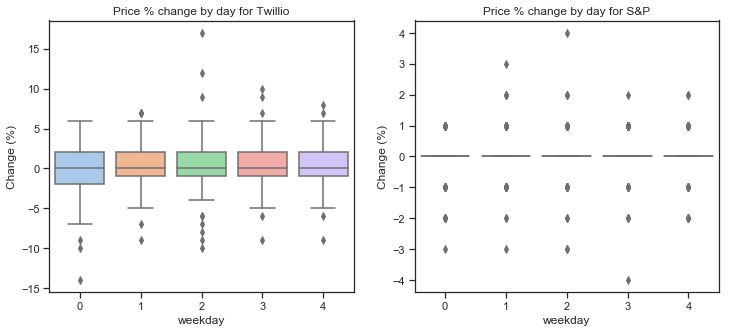

In [278]:
fig, axes = plt.subplots(nrows= 1,ncols=2)
fig.set_size_inches(12, 5)

sns.boxplot(x = 'weekday', y  ='perc_change', data = dat, orient = 'v', ax = axes[0]).set(ylabel = 'Change (%)', title= 'Price % change by day for Twillio')
sns.boxplot(x = 'weekday', y  ='perc_change', data = sp_dat, orient = 'v', ax = axes[1]).set(ylabel = 'Change (%)', title= 'Price % change by day for S&P')

plt.show()

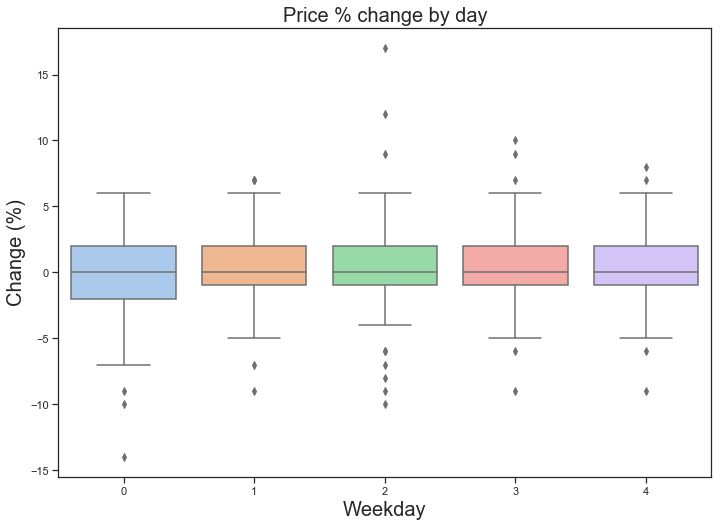

In [257]:
sns.set(style="ticks", palette="pastel")
dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=dims)
ax = sns.boxplot(x = 'weekday', y  ='perc_change', data = dat)
ax.set_title('Price % change by day', fontsize=20)
ax.set_xlabel('Weekday',fontsize=20)
ax.set_ylabel('Change (%)',fontsize=20)
plt.show()

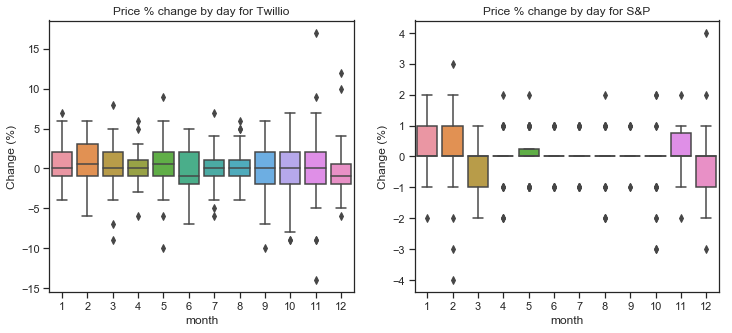

In [279]:
fig, axes = plt.subplots(nrows= 1,ncols=2)
fig.set_size_inches(12, 5)

sns.boxplot(x = 'month', y  ='perc_change', data = dat, orient = 'v', ax = axes[0]).set(ylabel = 'Change (%)', title= 'Price % change by day for Twillio')
sns.boxplot(x = 'month', y  ='perc_change', data = sp_dat, orient = 'v', ax = axes[1]).set(ylabel = 'Change (%)', title= 'Price % change by day for S&P')

plt.show()

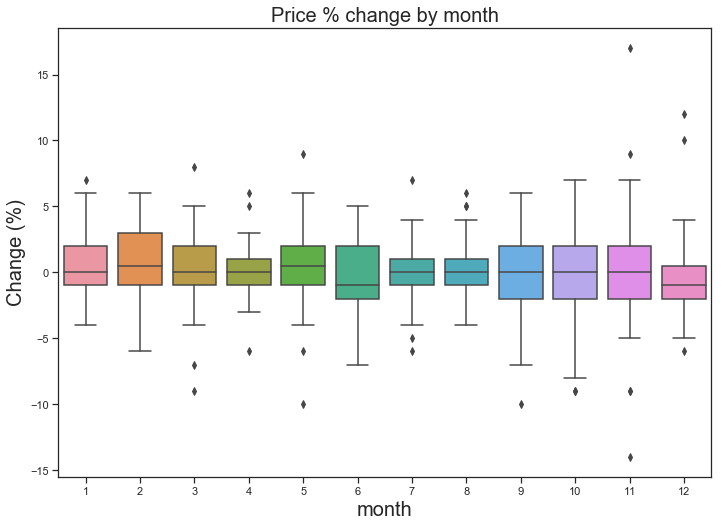

In [214]:
sns.set(style="ticks", palette="pastel")
dims = (11, 8)
fig, ax = pyplot.subplots(figsize=dims)
ax = sns.boxplot(x = 'month', y  ='perc_change', data = dat)
ax.set_title('Price % change by month', fontsize=20)
ax.set_xlabel('month',fontsize=20)
ax.set_ylabel('Change (%)',fontsize=20)
plt.show()

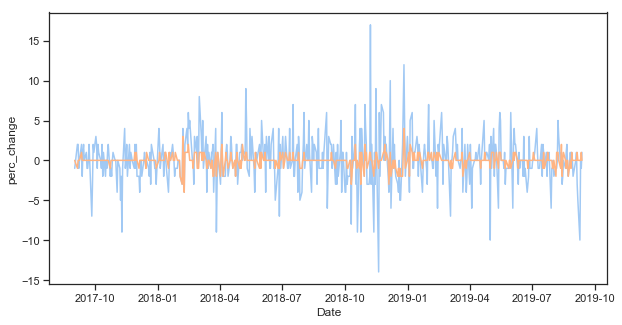

In [298]:
#from pylab import *

fig, ax = plt.subplots(figsize = (10, 5))

sns.lineplot(x = dat['Date'], y = dat['perc_change'])
sns.lineplot(x = sp_dat['Date'], y = sp_dat['perc_change'])

plt.show()

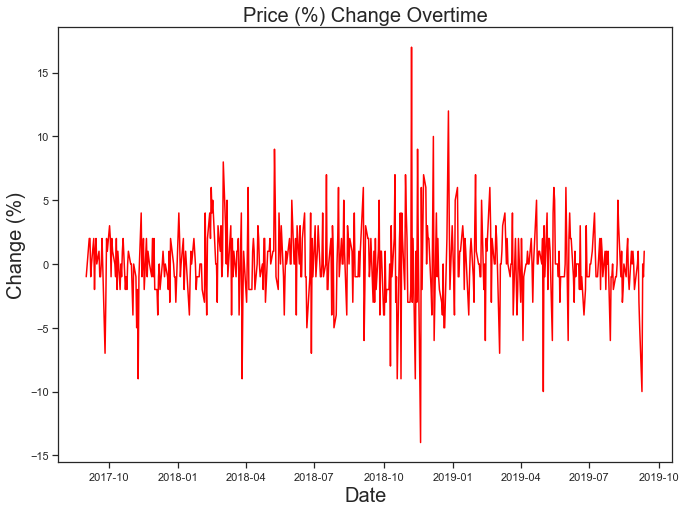

In [280]:
# price change over time
dims = (11,8)
fig, ax = plt.subplots(figsize=dims)
fig = sns.lineplot(x = dat['Date'], y = dat['perc_change'], color= 'red')
fig.set_title('Price (%) Change Overtime', fontsize= 20)
fig.set_xlabel('Date',fontsize=20)
fig.set_ylabel('Change (%)',fontsize=20)
plt.show()


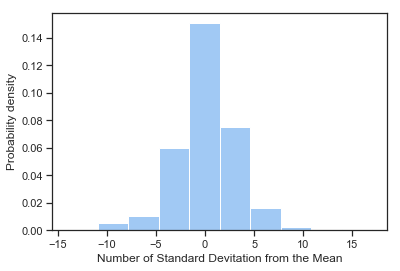

In [230]:
fig, ax = plt.subplots()

# the histogram of the data
ax.hist(dat['perc_change'],density=1)
ax.set_xlabel('Number of Standard Devitation from the Mean')
ax.set_ylabel('Probability density')
plt.show()

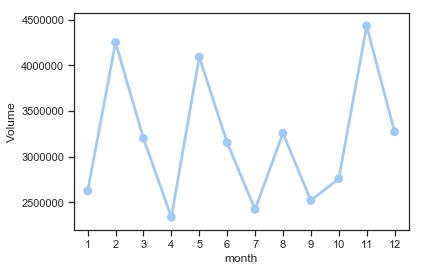

In [241]:
# mean of Volume by month
pp = sns.pointplot(x='month',y='Volume',data=dat.groupby(['month'])['Volume'].mean().reset_index())
plt.show()
                   

#### cov btw the two markets: 

A cov coefficient, symetry, is a measure of the volatility, or systematic risk, of an individual stock in comparison to the unsystematic risk of the entire market.The symetry calculation is used to help investors understand whether a stock moves in the same direction as the rest of the market, and how volatile or risky it is compared to the market. symetry can be used in conjution with return to indicate any anamoly in trading pattern. An increaed symetry should coincide with an increased return, however where that pattern fails to converge should merit further inspeciton. Twilio trades at an average of 2x beta to the market however there are some instances where that ratio reaches as far as 12x, those anamoly would merir further investigation

In [243]:
def calc_cov(stock,market):
    cov = np.cov(stock,market) # Calculate cov between stock and market
    symetry = cov[0,1]/cov[1,1]
    return symetry

In [252]:
# Calculate twillio symetry 
sp_return = sp_dat['perc_change']
twillio_return = dat['perc_change']

sp = []
twillio = []

count = 1
symetry_pt = []
for i in dat['perc_change']: 
    sp = sp_return[1:count]
    twillio = twillio_return[1:count]
    symetry = calc_cov(twillio, sp)
    symetry_pt.append(symetry)
    count += 1 

    
dat['symetry'] = symetry_pt

C:\Users\caffr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: Degrees of freedom <= 0 for slice
  


C:\Users\caffr\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\caffr\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


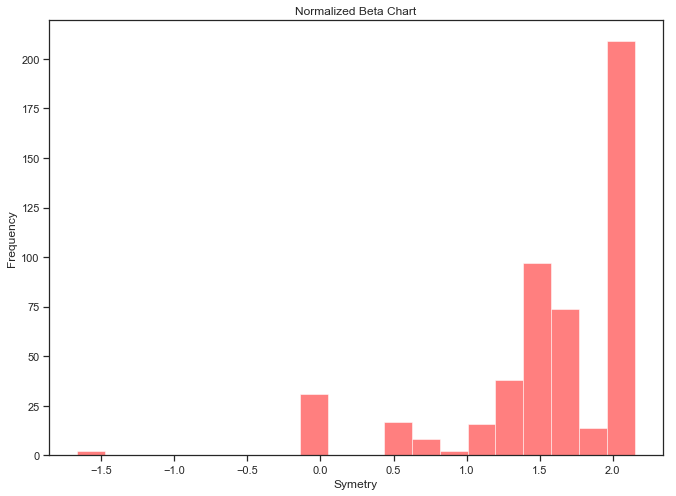

In [305]:
# Create histogram of data
dims = (11, 8)
fig, ax = pyplot.subplots(figsize=dims)

num_bins = 20
n, bins, patches = plt.hist(dat['symetry'], num_bins, color= 'red', alpha=0.5)
plt.xlabel('Symetry')
plt.ylabel('Frequency')
plt.title('Normalized Symetry Chart')
plt.show()

### Volume Normalized : 

When a frequency distribution is normally distributed, we can find out the probability of a score occurring by standardising the scores. The standard normal distribution simply converts the group of data in our frequency distribution such that the mean is 0 and the standard deviation. Normalized volume is a very useful statiscal measure since it allows us to calculate how many standard deviation an occurance is from the mean and calculate the probability of a score occurring within our normal distribution. The Analysis reveals that there are daily volumes that are as much as 9 standard deviations away from the mean. This new features reveals data points to further investigate. There are a number a number of factors that can imp

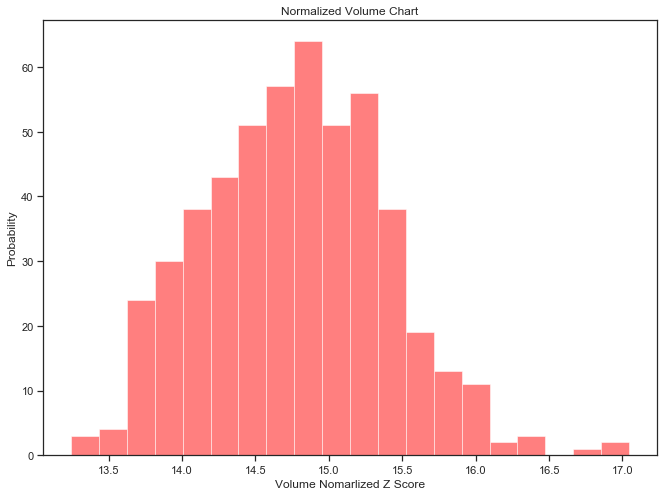

In [303]:
# Create histogram of data
dims = (11, 8)
fig, ax = pyplot.subplots(figsize=dims)

num_bins = 20
n, bins, patches = plt.hist(dat['log_vol'], num_bins,color= 'red', alpha=0.5)
plt.xlabel('Volume Nomarlized Z Score')
plt.ylabel('Probability')
plt.title('Normalized Volume Chart')
plt.show()

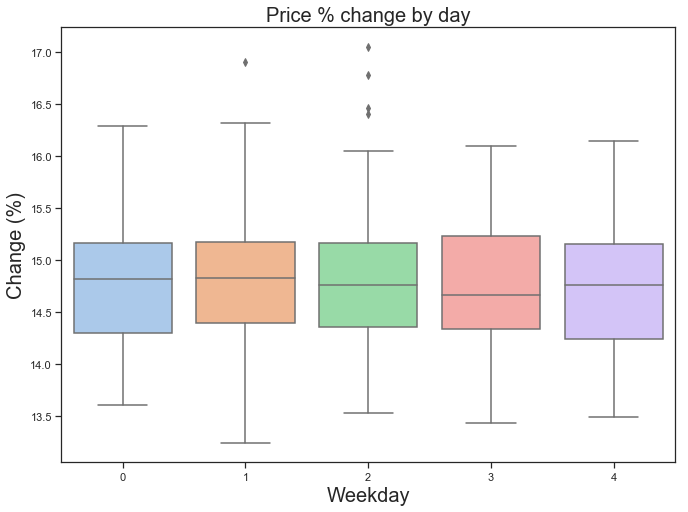

In [304]:
# price change by day 
sns.set(style="ticks", palette="pastel")
dims = (11, 8)
fig, ax = pyplot.subplots(figsize=dims)
ax = sns.boxplot(x = 'weekday', y  ='log_vol', data = dat)
ax.set_title('Price % change by day', fontsize=20)
ax.set_xlabel('Weekday',fontsize=20)
ax.set_ylabel('Change (%)',fontsize=20)
plt.show()

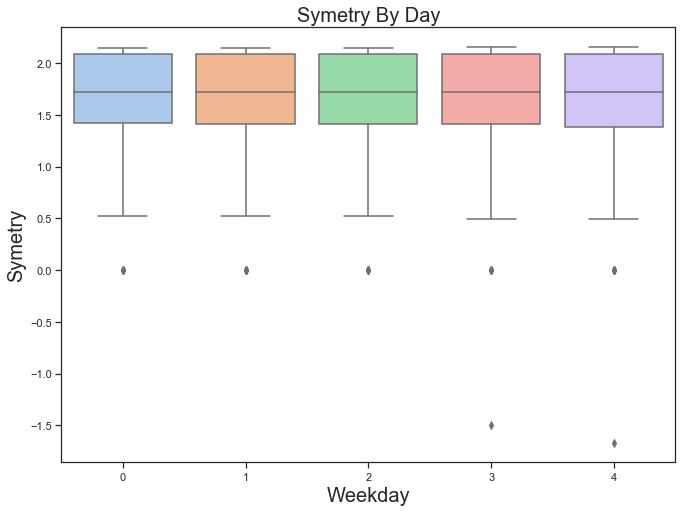

In [313]:
# price change by day 
sns.set(style="ticks", palette="pastel")
dims = (11, 8)
fig, ax = pyplot.subplots(figsize=dims)
ax = sns.boxplot(x = 'weekday', y  ='symetry', data = dat)
ax.set_title('Symetry By Day', fontsize=20)
ax.set_xlabel('Weekday',fontsize=20)
ax.set_ylabel('Symetry',fontsize=20)
plt.show()